In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('Credit_Card_Applications.csv')
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

In [5]:
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [6]:
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

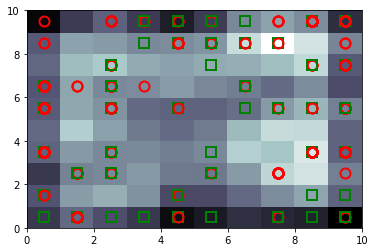

In [7]:
import matplotlib.pyplot as plt
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
markers=['o','s']
colors=['r','g']
for i,x  in enumerate(X):
    w=som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
plt.show()

In [22]:
mappings=som.win_map(X)

In [23]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [24]:
frauds.astype(int)

array([[15723827,        1,       76,       22,        2,        9,
               9,       12,        1,        1,        1,        1,
               2,        0,      110],
       [15725028,        1,       65,       11,        2,        9,
               9,       20,        1,        1,        7,        1,
               2,       22,        1],
       [15731989,        1,       67,        5,        2,        9,
               9,       13,        1,        1,        1,        1,
               2,        0,        1],
       [15808662,        0,       46,        4,        2,        5,
               3,        0,        1,        0,        0,        0,
               2,      100,      961],
       [15797246,        1,       23,        0,        2,        8,
               8,        0,        1,        0,        0,        0,
               2,      180,        1],
       [15757188,        0,       20,        3,        2,        6,
               4,        0,        1,        0,        0,